# Car Sales Prediction

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

## Read Data

In [8]:
dataset = pd.read_csv('Car_Purchasing_Data.csv')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [10]:
dataset.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
categorical_columns = [column for column in dataset.columns if dataset[column].dtype == 'O']
numerical_columns = [column for column in dataset.columns if dataset[column].dtype != 'O']

In [12]:
if len(dataset.columns) == len(categorical_columns) + len(numerical_columns):
    print('Partition Validated')

Partition Validated


## Exploratory Data Anaylysis

### Missing Values

In [13]:
dataset.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [14]:
missing_category = [column for column in dataset.columns if dataset[column].dtype == 'O' and dataset[column].isnull().sum() > 0]
missing_numerical = [column for column in dataset.columns if dataset[column].dtype != 'O' and dataset[column].isnull().sum() > 0]

### skewness

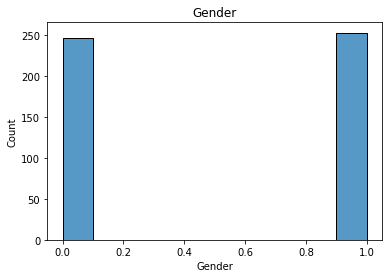

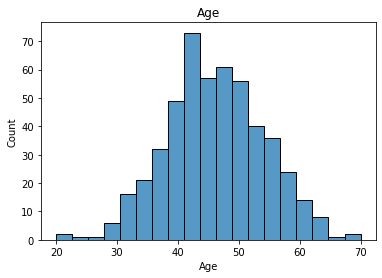

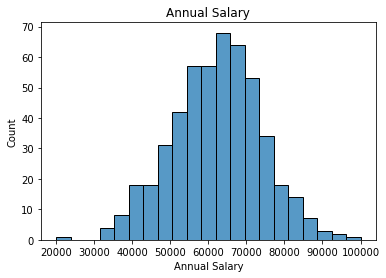

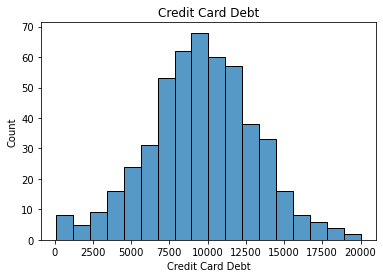

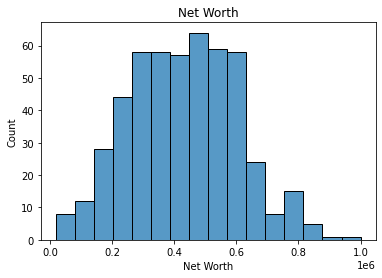

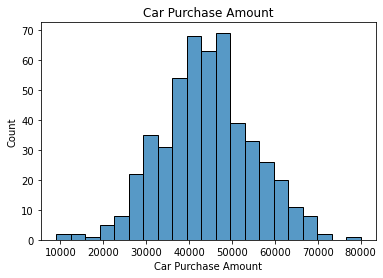

In [15]:
for column in numerical_columns:
    sns.histplot(dataset[column])
    plt.title(column)
    plt.show()

### Correlation

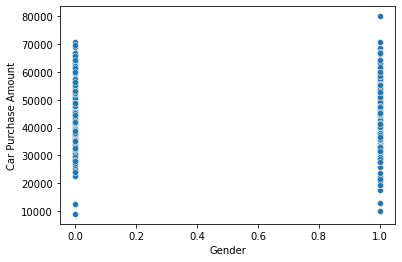

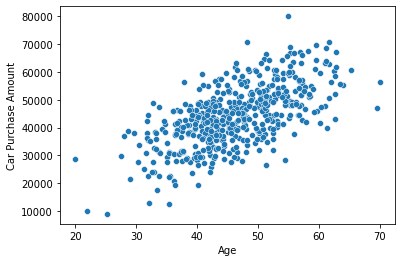

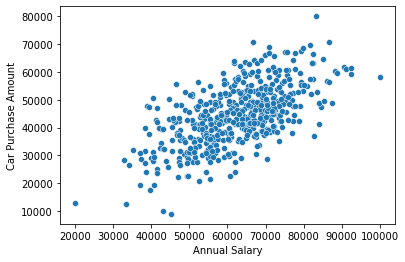

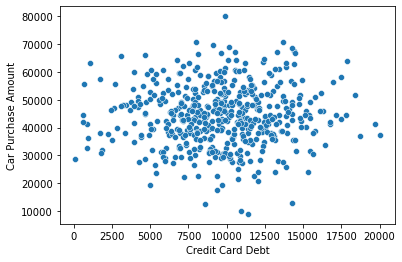

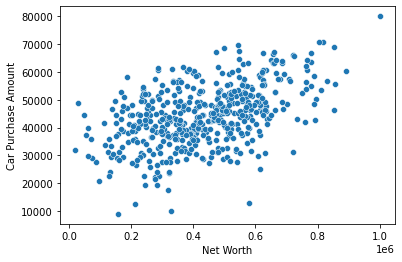

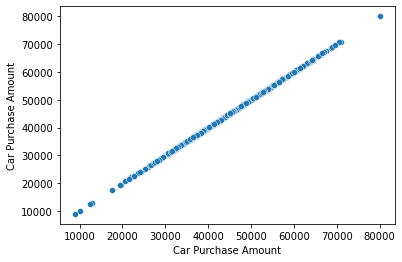

In [16]:
for column in numerical_columns:
    sns.scatterplot(x=column, y='Car Purchase Amount', data=dataset)
    plt.xlabel(column)
    plt.ylabel('Car Purchase Amount')
    plt.show()

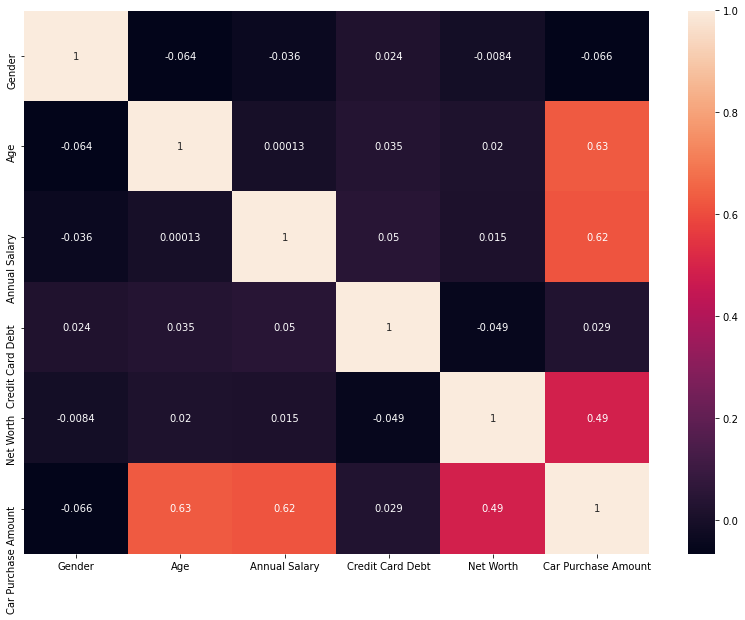

In [18]:
fig = plt.figure(figsize=(14,10))
sns.heatmap(dataset[numerical_columns].corr(), annot=True)
plt.show()

In [19]:
X = dataset.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
y = dataset['Car Purchase Amount']

### Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [100]:
model = Sequential()

model.add(Dense(25, 
                input_dim=len(X.columns),
                activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(25, 
               activation='relu',
               kernel_regularizer=l2()))

# model.add(BatchNormalization())

model.add(Dense(1,
         activation='linear'))

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime

log_dir = 'logs\\fit\\'
time = datetime.now().strftime('%d-%m-%Y--%H%M')
log_dir = log_dir + time

board = TensorBoard(log_dir=log_dir,
                   histogram_freq=1)

early_stopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              patience=10,
                              verbose=1)

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
model.fit(X_train, y_train, epochs=150, steps_per_epoch=160, validation_data=(X_test, y_test), callbacks=[early_stopping, board])

Epoch 1/150
160/160 [==============================] - 0s 956us/step - loss: 26180976.0000 - val_loss: 3203942.7500
Epoch 2/150
160/160 [==============================] - 0s 434us/step - loss: 24828652.0000 - val_loss: 3665468.2500
Epoch 3/150
160/160 [==============================] - 0s 428us/step - loss: 27675570.0000 - val_loss: 3128264.7500
Epoch 4/150
160/160 [==============================] - 0s 426us/step - loss: 28349038.0000 - val_loss: 3122196.5000
Epoch 5/150
160/160 [==============================] - 0s 434us/step - loss: 29747632.0000 - val_loss: 3501719.7500
Epoch 6/150
160/160 [==============================] - 0s 432us/step - loss: 27784102.0000 - val_loss: 2674475.0000
Epoch 7/150
160/160 [==============================] - 0s 421us/step - loss: 25426408.0000 - val_loss: 3787295.7500
Epoch 8/150
160/160 [==============================] - 0s 427us/step - loss: 25429604.0000 - val_loss: 3047736.7500
Epoch 9/150
160/160 [==============================] - 0s 434us/step - l

## Model Evaluation

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

MAE: 24176.01940565215
MSE: 588788922.7893875
R2 Score: -4.453104507050382


<AxesSubplot:xlabel='Car Purchase Amount', ylabel='Count'>

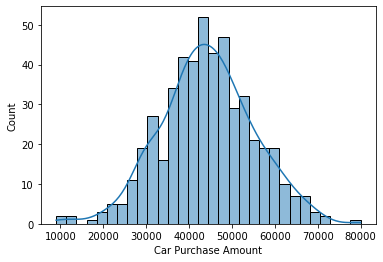

In [87]:
sns.histplot(x=dataset['Car Purchase Amount'], bins=30, kde=True)

In [89]:
dataset['Car Purchase Amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: Car Purchase Amount, dtype: float64

In [ ]:
model.save('')